# --------------------------- Imports and Functions ----------------------------

In [116]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, confusion_matrix

In [117]:
def calculate_accuracy(y_pred,y_test):
    print("Class 0 accuracy for the testing dataset  {:0.2f}%".format(accuracy_score(y_test.iloc[:,0], y_pred[:,0])*100))
    print("Class 1 accuracy for the testing dataset  {:0.2f}%".format(accuracy_score(y_test.iloc[:,1], y_pred[:,1])*100))
    print("Class 2 accuracy for the testing dataset  {:0.2f}%".format(accuracy_score(y_test.iloc[:,2], y_pred[:,2])*100))
    print("Overall accuracy for the testing dataset  {:0.2f}%".format(accuracy_score(y_test, y_pred)*100))

def calculate_f1_score(y_pred,y_test):
    print("Class 0 F1 score for the testing dataset  {:0.2f}".format(f1_score(y_test.iloc[:,0], y_pred[:,0], average= 'macro')))
    print("Class 1 F1 score for the testing dataset  {:0.2f}".format(f1_score(y_test.iloc[:,1], y_pred[:,1], average= 'macro')))
    print("Class 2 F1 score for the testing dataset  {:0.2f}".format(f1_score(y_test.iloc[:,2], y_pred[:,2], average= 'macro')))
    print("Overall F1 score for the testing dataset  {:0.2f}".format(f1_score(y_test, y_pred, average= 'macro')))

def roc_plot(y_pred,y_test):
    n = 3
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    for i in range(n):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i, color in zip(range(n), list(['blue', 'red', 'green'])):
        plt.plot(fpr[i], tpr[i], color=color, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

# --------------------------- Data Preprocessing -------------------------------

In [118]:
wine = load_wine()
X = pd.DataFrame(wine['data'], columns= wine['feature_names'])
y = pd.DataFrame(wine['target'], columns=['target'])
X.sample(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
21     12.93        3.80  2.65               18.6      102.0           2.41   
144    12.25        3.88  2.20               18.5      112.0           1.38   
116    11.82        1.47  1.99               20.8       86.0           1.98   
152    13.11        1.90  2.75               25.5      116.0           2.20   
5      14.20        1.76  2.45               15.2      112.0           3.27   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
21         2.41                  0.25             1.98             4.50  1.03   
144        0.78                  0.29             1.14             8.21  0.65   
116        1.60                  0.30             1.53             1.95  0.95   
152        1.28                  0.26             1.56             7.10  0.61   
5          3.39                  0.34             1.97             6.75  1.05   

     od280/od315_of_diluted_wines  proline  
21                           3.52    770.0  
144                          2.00    855.0  
116                          3.33    495.0  
152                          1.33    425.0  
5                            2.85   1450.0

In [119]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= wine['feature_names'])
X.sample(5)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
166  0.636842    0.584980  0.663102           0.639175   0.445652   
137  0.394737    0.942688  0.684492           0.742268   0.282609   
156  0.739474    0.667984  0.545455           0.458763   0.206522   
19   0.686842    0.466403  0.641711           0.237113   0.500000   
82   0.276316    0.077075  0.614973           0.690722   0.086957   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
166       0.248276    0.122363              0.566038         0.331230   
137       0.279310    0.054852              0.943396         0.217666   
156       0.282759    0.103376              0.660377         0.362776   
19        0.593103    0.567511              0.075472         0.394322   
82        0.351724    0.261603              0.509434         0.312303   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
166         0.802048  0.300813                      0.106227  0.297432  
137         0.317406  0.276423                      0.153846  0.169044  
156         0.659556  0.073171                      0.135531  0.144080  
19          0.325939  0.390244                      0.765568  0.404422  
82          0.078498  0.674797                      0.531136  0.251070

In [120]:
y = pd.DataFrame(label_binarize(y, classes=[0, 1, 2]), columns=['0','1','2'])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ------------------------- Pairwise relations plot ----------------------------

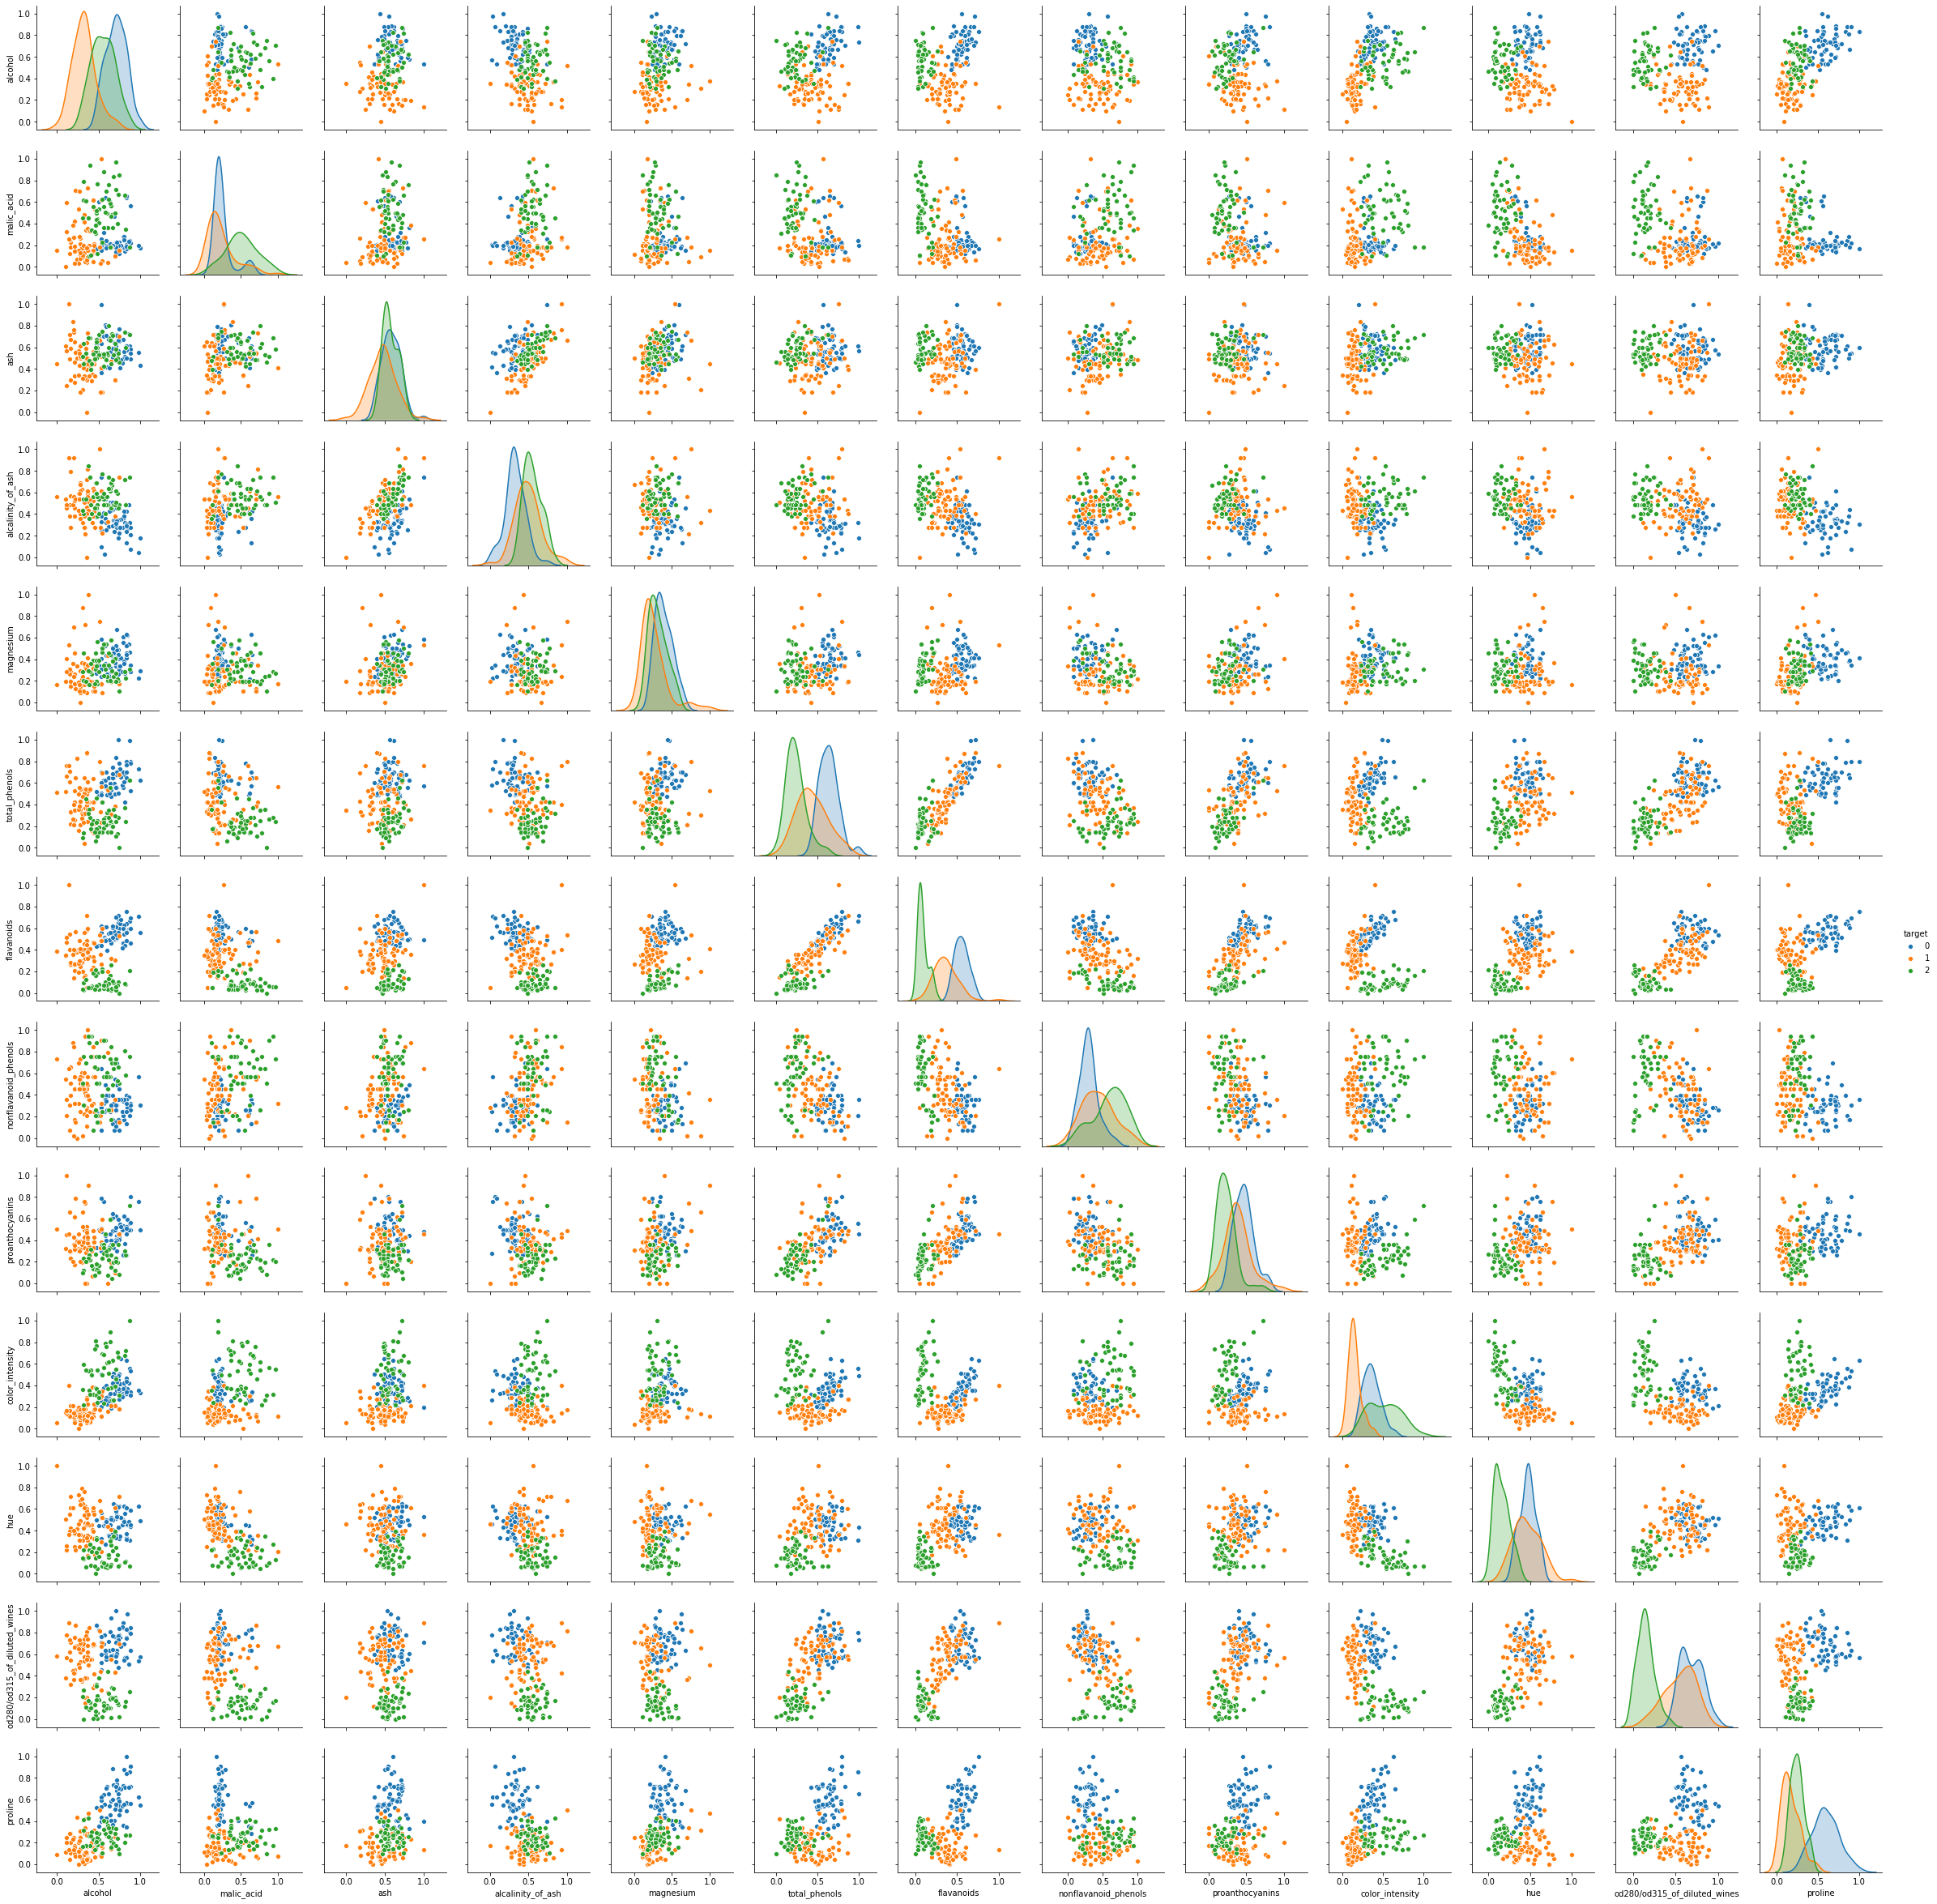

In [7]:
X['target'] = wine['target']
sns.pairplot(X, hue = "target")

### Inferences
  i) There is a linear relationship in 'flavanoids' and 'total_phenols'

 ii) There is a linear relationship in 'flavanoids' and 'od280/od315_of_diluted_wines'

iii) If we apply KNN on 'od280/od315_of_diluted_wines' and 'proline' the model will be a good fit

iv) There is a linear relationship in 'flavanoids' and 'Color intensity'

# -------------------------- Gaussian Naive Bayes ------------------------------

In [154]:
t0=time.time()
gnb = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
print("Training time:  ", round(time.time()-t0, 3), "s")

t1=time.time()
y_pred = gnb.predict(X_test)
print("Prediction time:", round(time.time()-t1, 3), "s")

Training time:   0.738 s
Prediction time: 0.022 s


In [155]:
calculate_f1_score(y_pred,y_test)

Class 0 F1 score for the testing dataset  0.94
Class 1 F1 score for the testing dataset  1.00
Class 2 F1 score for the testing dataset  0.95
Overall F1 score for the testing dataset  0.95


In [156]:
calculate_accuracy(y_pred,y_test)

Class 0 accuracy for the testing dataset  94.44%
Class 1 accuracy for the testing dataset  100.00%
Class 2 accuracy for the testing dataset  96.30%
Overall accuracy for the testing dataset  90.74%


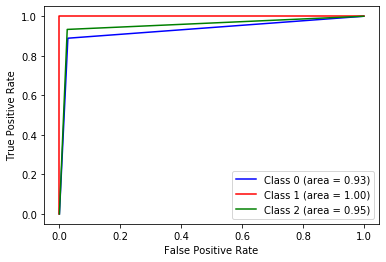

In [157]:
roc_plot(y_pred,y_test)


# ----------------------------- Decision Tree ----------------------------------

In [158]:
parameters = [{'criterion': ['ginni', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}]
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters)

t0=time.time()
clf.fit(X_train, y_train)
print("Training time:  ", round(time.time()-t0, 3), "s")

t1=time.time()
y_pred = clf.predict(X_test)
print("Prediction time:", round(time.time()-t1, 3), "s")

print("\n",clf.best_params_)

Training time:   1.593 s
Prediction time: 0.002 s

 {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


In [159]:
calculate_f1_score(y_pred,y_test)

Class 0 F1 score for the testing dataset  0.96
Class 1 F1 score for the testing dataset  0.94
Class 2 F1 score for the testing dataset  0.98
Overall F1 score for the testing dataset  0.95


In [160]:
calculate_accuracy(y_pred,y_test)

Class 0 accuracy for the testing dataset  96.30%
Class 1 accuracy for the testing dataset  94.44%
Class 2 accuracy for the testing dataset  98.15%
Overall accuracy for the testing dataset  94.44%


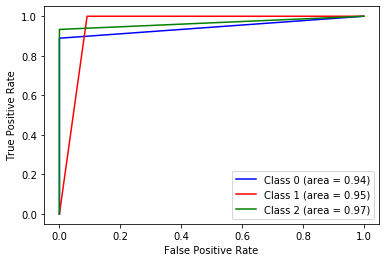

In [161]:
roc_plot(y_pred,y_test)

### Observation:

The decision tree model gives a better fit with entropy as splitting criteria. If we fix the max-depth(height) of the tree to 5 we can still get good accuracy,precision and recall with lesser time to train the model.

# ---------------------------------- KNN ---------------------------------------

In [162]:
neigh = KNeighborsClassifier(n_neighbors=3)

t0=time.time()
neigh.fit(X_train, y_train)
print("Training time:  ", round(time.time()-t0, 3), "s")

t1=time.time()
y_pred = neigh.predict(X_test)
print("Prediction time:  ", round(time.time()-t1, 3), "s")

Training time:   0.088 s
Prediction time:   0.05 s


In [163]:
calculate_f1_score(y_pred,y_test)

Class 0 F1 score for the testing dataset  1.00
Class 1 F1 score for the testing dataset  0.98
Class 2 F1 score for the testing dataset  0.98
Overall F1 score for the testing dataset  0.98


In [164]:
calculate_accuracy(y_pred,y_test)

Class 0 accuracy for the testing dataset  100.00%
Class 1 accuracy for the testing dataset  98.15%
Class 2 accuracy for the testing dataset  98.15%
Overall accuracy for the testing dataset  98.15%


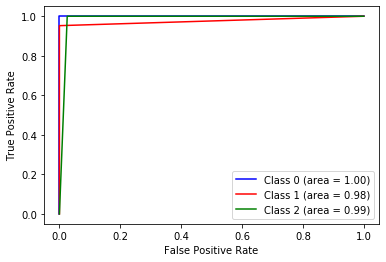

In [165]:
roc_plot(y_pred,y_test)

# ---------------------------- Models Comparison -------------------------------

When we compare these three models we can see that KNN is a winner as it trains and prdict in lesser time than the other two models.
Also we can see that decision tree provides best fit model for the given dataset as its accuracy and f1_score is always equal or greater than the other two models. 

We can rank the models as :-

1 : KNN

2 : Decision tree

3 : Gaussian Naive Bayes



When we see the ROC curves we can clearly see that all the models are very good in distinguishing between classes and we can say it is a tie in measure of separability. However we in the KNN algorithm we can see that the degree of separability for all the classes is very similiar.

So it will be not wrong to say that the model is genralized and not focusing on any one/two classes.